In [14]:
from sklearn import cross_validation, datasets, metrics, neighbors 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pandas import DataFrame
import scipy.stats as sts
import scipy.optimize as opt

In [2]:
x = sts.uniform(loc=0, scale=10).rvs(size=500)
x = np.array(x)
y = 0.5 * x + 1
e = sts.norm(loc=0, scale=0.2 ** 0.5).rvs(size=500)
e = np.array(e)
y = y + e

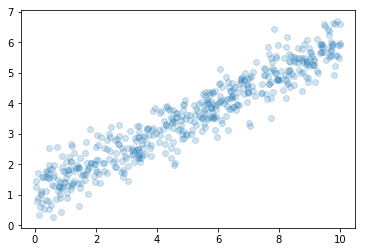

In [3]:
plt.scatter(x, y, alpha=0.2)
plt.show()

In [4]:
def MSE(args):
    k = args[0]
    b = args[1]
    predictions = k * x + b
    mse = ((predictions - y) ** 2).mean()
    return mse

In [5]:
args = opt.minimize(MSE, [0, 0])
[k, b] = args.x

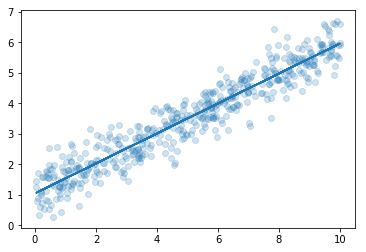

In [6]:
plt.scatter(x, y, alpha=0.2)
plt.plot(x, k * x + b)
plt.show()

In [7]:
e_new = sts.norm(loc=0, scale=0.2 ** 0.5).rvs(size=75)
y_new = np.array([-1] * 75) + e_new
x_new = sts.uniform(loc=0, scale=10).rvs(size=75)
x_new = np.array(x_new)

In [8]:
X = np.append(x, x_new)
Y = np.append(y, y_new)

In [9]:
def newMSE(args):
    k = args[0]
    b = args[1]
    predictions = k * X + b
    mse = ((predictions - Y) ** 2).mean()
    return mse

In [10]:
def newMAE(args):
    k = args[0]
    b = args[1]
    predictions = k * X + b
    mae = (np.absolute(predictions - Y)).mean()
    return mae

In [11]:
args_mse = opt.minimize(newMSE, [0, 0])
[k_mse, b_mse] = args_mse.x

In [12]:
args_mae = opt.minimize(newMAE, [0, 0])
[k_mae, b_mae] = args_mae.x

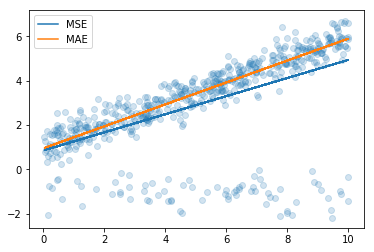

In [13]:
plt.scatter(X, Y, alpha=0.2)
plt.plot(X, k_mse * X + b_mse, label="MSE")
plt.plot(X, k_mae * X + b_mae, label="MAE")
plt.legend()
plt.show()

MAE более устойчивая к выбросам, что и логично, так как там большая ошибка не увеличивается еще больше возведением в квадрат.